In [1]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr
import stablerank.geometry_objects_2020 as ge

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import _pickle as pickle

from ripser import ripser
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from PIL import Image

#from keras.datasets import mnist
#from matplotlib import pyplot

### Import Data

In [2]:
# loading the data

df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv', sep=',')
#df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv', sep=',',header=None)

In [7]:
# Removing duplicate values and reindexing

df.drop_duplicates(subset =[" pixels"], inplace = True)
df=df.reindex(range(0,len(df)-1))

In [8]:
# Inspecting the Dataframe

df

,emotion,Usage,pixels
0,0.0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0.0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2.0,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4.0,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6.0,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
34028,0.0,PrivateTest,157 157 157 157 156 156 155 155 157 155 155 14...
34029,3.0,PrivateTest,24 33 41 48 48 58 75 95 110 139 158 172 178 18...
34030,5.0,PrivateTest,42 70 65 49 34 33 34 39 58 61 86 86 68 93 76 5...
34031,0.0,PrivateTest,49 47 51 60 60 61 66 70 74 74 70 63 65 75 69 6...


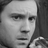

In [389]:
# Printing the first picture
first_picture = [int(numeric_string) for numeric_string in df[" pixels"][0].split(' ')]
first_picture_arr = np.array(first_picture)
first_picture_arr.resize((48,48))
im = Image.fromarray((255-first_picture_arr* 255).astype(np.uint8))
im

## $H_0$ Stable Ranks for Embedding 1

In [29]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_categories = [0,1,2,3,4,5,6]
colours=["red","blue","yellow","orange","green","black","purple"]

# specifying the number of pictures for subsampling
number_of_pictures = 100 # How many pictures per subsampling
number_of_times = 2 # How often to perform subsampling for each emotion

# specifying metric
metric = "cityblock"
metric_parameter = 3

# specifying clustering method
clustering_method = "single"

plt.figure(figsize=(20,20))

for e in emotion_categories:
    # Initialize empty pcf
    f_pcf=sr.Pcnif(np.array([]))
    
    for k in range(1,number_of_times):
        # Subsampling the positions
        pos = np.array(np.where(df["emotion"]==e))[0]
        rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]

        # Preparing an empty array to convert the pixel vectors from string to float
        points_dummy = np.empty((len(rand_pos),48*48), int)

        for i in range(0,len(rand_pos)):
            points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

        # Create the point cloud
        points = np.vstack(points_dummy)
        point_cloud = sr.EucObject(points)

        # Add the pcf to the overall pcf but weighted to get the overall average in the end
        f_pcf = f_pcf + point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter)*(1/number_of_times)
    
    # plot the average pcf
    f_pcf.plot(color=colours[emotion_categories.index(e)])

    #print("size: ", point_cloud.size)
    #print("dimension: ", point_cloud.dim)
    #print("points: ", point_cloud.points)

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1440x1440 with 0 Axes>

## Homology for Embedding 1

In [ ]:
#metrics = ["euclidean", "cityblock", "hamming", "chebyshev", "cosine"]
metrics = ["euclidean"]

pos = np.array(np.where(df["emotion"]==5))[0]
rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:100])]
points_dummy = np.empty((len(rand_pos),48*48), int)

for i in range(0,len(rand_pos)):
    points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

points = np.vstack(points_dummy)
em = sr.EucObject(points)


D ={}
for m in metrics:
    D[m] = em.get_distance(metric = m)

maxdim = 3
coeff = 2
for m in metrics:
    bc = D[m].get_bc(maxdim = maxdim, coeff = coeff)
    fig=plt.figure(m, figsize = (20,10))
    fig.suptitle(m, fontsize=16)
    #ax=plt.subplot(1,2,1)
    #ax.set_title("H0")
    #bc["H0"].plot()
    #ax=plt.subplot(1,2,2)
    #ax.set_title("H1")
    #bc["H1"].plot()
    ax=plt.subplot(1,2,1)
    ax.set_title("H2")
    bc["H2"].plot()
    ax=plt.subplot(1,2,2)
    ax.set_title("H3")
    bc["H3"].plot()

### Try out area

In [391]:
#Schmierblatt

pos = np.array(np.where(df["emotion"]==3))[0]
rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:20])]
points_dummy = np.empty((len(rand_pos),48*48), int)

for i in range(0,len(rand_pos)):
    points_dummy[i] = [int(numeric_string) for numeric_string in df[" pixels"][rand_pos[i]].split(' ')]

#points = np.vstack(points_dummy)
#df[" pixels"].loc[pos]

In [392]:
angry = sr.EucObject(points)
print("size: ", angry.size)
print("dimension: ", angry.dim)
print("points: ", angry.points)

size:  20
dimension:  2304
points:  [[ 16.  14.  15. ... 136. 111. 129.]
 [254. 252. 254. ...  15.  22.  29.]
 [ 52.  61.  60. ...  49.  43.  43.]
 ...
 [ 88.  93.  94. ...  94.  92.  95.]
 [158. 189. 198. ... 173. 153. 135.]
 [ 78.  52.  45. ...  60.  28.  38.]]


In [413]:
# specifying metric
metric = "minkowski"
metric_parameter = 3

# specifying clustering method
clustering_method = "complete"


f1 = angry.get_h0sr(metric = metric, metric_parameter = metric_parameter)


#plt.figure(figsize=(20,20))

#f1.plot(color ="blue")

AttributeError: 'Pcnif' object has no attribute 'save'

In [14]:
sr.Pcf(np.array([]))